# Initialize Settings

In [1]:
from numpy import NaN
import numpy as np
from random import randint
import pandas as pd  
import csv 
import geopy.distance
import seaborn as sns
### Apply the default default seaborn theme, scaling, and color palette
sns.set()
import matplotlib.pyplot as plt
import math 
from operator import itemgetter
import os
 
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn import tree
from sklearn.tree import _tree

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score, f1_score, accuracy_score 
from sklearn.model_selection import cross_val_score
 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
#from tensorflow.keras.layers import Dense, Activation, Flatten

!pip install lazypredict

from lazypredict.Supervised import   LazyClassifier
 
import joblib 
import sys
sys.modules['sklearn.externals.joblib'] = joblib
# !pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
 
# Set option to format printing of Float columns
pd.options.display.float_format = '{:.2f}'.format

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# def warn(*args, **kwargs):
#     pass
# import warnings
# warnings.warn = warn

In [3]:
# Mount Google Drive

from google.colab import drive
#drive.mount('/content/gdrive')
drive.mount('/gdrive') 
%cd /gdrive/My\ Drive/MSDS\ 498\ Capstone/4.\ Analytics/4a.\ Data 

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/MSDS 498 Capstone/4. Analytics/4a. Data


# Import Data Files

In [4]:
'''

In modeling....

These variables will be excluded as Independent variables:

PID -- this is the unique ID
Target -- this is the Y variable


These variables will be one-hot encoded:
 
NUM_FLOORS_GRPD
R_BLDG_STYL_GRPD
R_ROOF_TYP_GRPD
R_EXT_FIN_GRPD
R_BDRMS_GRPD
R_FULL_BTH_GRPD
R_HALF_BTH_GRPD
R_BTH_STYLE
R_BTH_STYLE2
R_KITCH_STYLE
R_HEAT_TYP_GRPD
R_AC
R_FPLACE_GRPD
R_EXT_CND_GRPD
R_OVRALL_CND_GRPD
REMODELED_EVER_FLAG

All Other Variables will be treated as continuous.


'''

'\n\nIn modeling....\n\nThese variables will be excluded as Independent variables:\n\nPID -- this is the unique ID\nTarget -- this is the Y variable\n\n\nThese variables will be one-hot encoded:\n \nNUM_FLOORS_GRPD\nR_BLDG_STYL_GRPD\nR_ROOF_TYP_GRPD\nR_EXT_FIN_GRPD\nR_BDRMS_GRPD\nR_FULL_BTH_GRPD\nR_HALF_BTH_GRPD\nR_BTH_STYLE\nR_BTH_STYLE2\nR_KITCH_STYLE\nR_HEAT_TYP_GRPD\nR_AC\nR_FPLACE_GRPD\nR_EXT_CND_GRPD\nR_OVRALL_CND_GRPD\nREMODELED_EVER_FLAG\n\nAll Other Variables will be treated as continuous.\n\n\n'

In [5]:
# Import Modeling Set
df1 = pd.read_csv('pa_2019_classification_modeling_input.csv', low_memory=False)
df1.shape
df1.info(verbose=True, show_counts=True )
df1.head()

(19991, 111)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 111 columns):
 #    Column                                        Non-Null Count  Dtype  
---   ------                                        --------------  -----  
 0    PID                                           19991 non-null  int64  
 1    R_TOTAL_RMS                                   19991 non-null  float64
 2    R_BTH_STYLE                                   19991 non-null  object 
 3    R_BTH_STYLE2                                  19991 non-null  object 
 4    R_KITCH_STYLE                                 19991 non-null  object 
 5    R_AC                                          19991 non-null  object 
 6    inc_cnt_fam_married_couple_total              19991 non-null  int64  
 7    inc_pct_fam_married_couple_inc_35000_49999    19991 non-null  float64
 8    inc_pct_fam_married_couple_inc_50000_74999    19991 non-null  float64
 9    inc_pct_fam_married_couple_inc_75000_99999    19

,PID,R_TOTAL_RMS,R_BTH_STYLE,R_BTH_STYLE2,R_KITCH_STYLE,R_AC,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,...,R_FPLACE_GRPD,R_EXT_CND_GRPD,R_OVRALL_CND_GRPD,AV_LAND_LOG,AV_BLDG_LOG,AV_TOTAL_LOG,LAND_SF_LOG,GROSS_AREA_LOG,LIVING_AREA_LOG,AGE_REMODEL_LOG
0,1000019000,8.00,M,Null,S,N,91,15.40,0.00,23.10,...,0.00,A,A,12.43,13.17,13.56,7.27,7.90,7.61,NaN
1,1000024000,6.00,M,M,M,N,91,15.40,0.00,23.10,...,1.00,A,A,12.43,13.32,13.67,7.27,7.91,7.61,1.10
2,1000027000,8.00,M,S,M,C,91,15.40,0.00,23.10,...,1.00,G,G,12.43,13.57,13.85,7.27,8.06,7.86,2.94
3,1000029000,8.00,M,M,M,C,91,15.40,0.00,23.10,...,0.00,G,A,12.43,13.22,13.59,7.27,7.90,7.61,NaN
4,1000093000,8.00,S,S,M,N,91,15.40,0.00,23.10,...,0.00,G,G,12.54,13.46,13.80,7.38,7.93,7.69,NaN


# Plug Missing AGE_REMODEL values with AGE_BUILT

(19991, 140)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PID          19991 non-null  int64  
 1   AGE_BUILT    19991 non-null  float64
 2   AGE_REMODEL  6859 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 468.7 KB


,PID,AGE_BUILT,AGE_REMODEL
0,1000019000,119.00,NaN
1,1000024000,119.00,3.00
2,1000027000,144.00,19.00
3,1000029000,119.00,NaN
4,1000093000,119.00,NaN
5,1000094000,119.00,57.00
6,1000095000,119.00,34.00
7,1000096000,119.00,16.00
8,1000099000,123.00,19.00
9,1000111000,119.00,NaN



# Missing AGE_BUILT before plug: 13132 



,PID,AGE_BUILT,AGE_REMODEL
0,1000019000,119.00,119.00
1,1000024000,119.00,3.00
2,1000027000,144.00,19.00
3,1000029000,119.00,119.00
4,1000093000,119.00,119.00
5,1000094000,119.00,57.00
6,1000095000,119.00,34.00
7,1000096000,119.00,16.00
8,1000099000,123.00,19.00
9,1000111000,119.00,119.00



# Missing AGE_BUILT after plug: 0


<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Original: AGE_REMODEL')

Text(0.5, 1.0, 'Log Transformed: AGE_REMODEL')

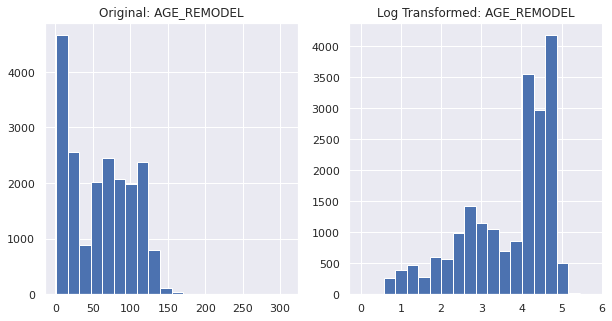

In [6]:
# Import the EDA Set
agedf = pd.read_csv('pa_2019_eda_output.csv', low_memory=False)
agedf.shape
agedf = agedf[["PID","AGE_BUILT","AGE_REMODEL"]]
agedf.info(verbose=True, show_counts=True )
agedf.head(10)
print('\n# Missing AGE_BUILT before plug:', agedf['AGE_REMODEL'].isna().sum(),'\n')

# Plug Missing "AGE_REMODEL" with "AGE_BUILT"
agedf["AGE_REMODEL"] = np.where(agedf['AGE_REMODEL'].isna(), agedf['AGE_BUILT'], agedf['AGE_REMODEL'])
agedf.head(10)
print('\n# Missing AGE_BUILT after plug:', agedf['AGE_REMODEL'].isna().sum() )

# Show Plots of Original Data Compared to Log Transformed Version
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original: AGE_REMODEL')
agedf['AGE_REMODEL'].hist(bins=20)
plt.subplot(1, 2, 2)
plt.title('Log Transformed: AGE_REMODEL') 
np.log(agedf['AGE_REMODEL']).hist(bins=20)

# There is no value of tranforming AGE_REMODEL to LOG


### Add AGE_REMODEL to DF and Drop AGE_REMODEL_LOG

In [7]:
df1 = pd.merge(df1, agedf[['PID','AGE_REMODEL']], left_on='PID', right_on="PID", how='left') 
df1 = df1.drop('AGE_REMODEL_LOG', axis=1)
df1.shape 
df1.head()

(19991, 111)

,PID,R_TOTAL_RMS,R_BTH_STYLE,R_BTH_STYLE2,R_KITCH_STYLE,R_AC,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,...,R_FPLACE_GRPD,R_EXT_CND_GRPD,R_OVRALL_CND_GRPD,AV_LAND_LOG,AV_BLDG_LOG,AV_TOTAL_LOG,LAND_SF_LOG,GROSS_AREA_LOG,LIVING_AREA_LOG,AGE_REMODEL
0,1000019000,8.00,M,Null,S,N,91,15.40,0.00,23.10,...,0.00,A,A,12.43,13.17,13.56,7.27,7.90,7.61,119.00
1,1000024000,6.00,M,M,M,N,91,15.40,0.00,23.10,...,1.00,A,A,12.43,13.32,13.67,7.27,7.91,7.61,3.00
2,1000027000,8.00,M,S,M,C,91,15.40,0.00,23.10,...,1.00,G,G,12.43,13.57,13.85,7.27,8.06,7.86,19.00
3,1000029000,8.00,M,M,M,C,91,15.40,0.00,23.10,...,0.00,G,A,12.43,13.22,13.59,7.27,7.90,7.61,119.00
4,1000093000,8.00,S,S,M,N,91,15.40,0.00,23.10,...,0.00,G,G,12.54,13.46,13.80,7.38,7.93,7.69,119.00


In [8]:
colnames = []
coltypes = []
colnulls = []
coluniqs = []
colrows  = []
colpop   = []

dfcols = list(df1.columns)

for i in range(len(dfcols)):

  col    = dfcols[i]                   # column name
  coltyp = df1.iloc[:,i].dtypes        # column type
  n_null = df1.iloc[:,i].isna().sum()  # number of nulls
  n_uniq = len(df1.iloc[:,i].unique()) # number unique
  n_rows = len(df1.iloc[:,i])          # number rows
  n_pop  = n_rows - n_null             # number populated

  colnames.append(col)
  coltypes.append(coltyp)
  colnulls.append(n_null)
  coluniqs.append(n_uniq)
  colrows.append(n_rows)
  colpop.append(n_pop)
  #print(col + str(n_null) + str(n_uniq) + str(n_rows) + str(n_pop) + str(coltyp))

eda_df = pd.DataFrame(colnames)
eda_df.columns = ['Name']
eda_df["Type"] = coltypes
eda_df["Observations"] = colrows
eda_df["Populated"] = colpop
eda_df["Unique"] = coluniqs
eda_df["Missing"] = colnulls

pd.set_option('display.max_rows', 200)
eda_df

,Name,Type,Observations,Populated,Unique,Missing
0,PID,int64,19991,19991,19991,0
1,R_TOTAL_RMS,float64,19991,19991,18,0
2,R_BTH_STYLE,object,19991,19991,4,0
3,R_BTH_STYLE2,object,19991,19991,5,0
4,R_KITCH_STYLE,object,19991,19991,4,0
5,R_AC,object,19991,19991,3,0
6,inc_cnt_fam_married_couple_total,int64,19991,19991,79,0
7,inc_pct_fam_married_couple_inc_35000_49999,float64,19991,19991,55,0
8,inc_pct_fam_married_couple_inc_50000_74999,float64,19991,19991,67,0
9,inc_pct_fam_married_couple_inc_75000_99999,float64,19991,19991,68,0


# Modify the Target Variable by Adding in 2018 Remodels

In [9]:
# Read in Property Assessment Files from 2021 and 2022
url2022= 'https://data.boston.gov/dataset/e02c44d2-3c64-459c-8fe2-e1ce5f38a035/resource/4b99718b-d064-471b-9b24-517ae5effecc/download/fy2022pa-4.csv'  
url2021= 'https://data.boston.gov/dataset/e02c44d2-3c64-459c-8fe2-e1ce5f38a035/resource/c4b7331e-e213-45a5-adda-052e4dd31d41/download/data2021-full.csv'

In [10]:
framelist=[[url2022,'2022'], [url2021,'2021']]
dflist=[]
for frame in framelist:
  df= pd.read_csv(frame[0], low_memory=False)
  df["filename"] = frame[1]
  df["PID"] = df["PID"].astype(str)

  dflist.append(df)


# isolate 2022 file
pa2022_df=dflist[0]
print(pa2022_df.shape)

# isolate 2021 file
pa2021_df=dflist[1]
print(pa2021_df.shape)


(178598, 65)
(177091, 64)


In [11]:
# Isolate the Remodel Year from the 2021 and 2022 Files
pa2022_df = pa2022_df[['PID','YR_REMODEL']]
pa2022_df.columns = ["PID","YR_REMODEL_2022PA"]
pa2022_df['PID'] = pa2022_df['PID'].astype(int)
print(pa2022_df.shape)
print(pa2022_df.head())

pa2021_df = pa2021_df[['PID','YR_REMODEL']]
pa2021_df.columns = ["PID","YR_REMODEL_2021PA"]
pa2021_df['PID'] = pa2021_df['PID'].astype(int)
print(pa2021_df.shape)
print(pa2021_df.head())

(178598, 2)
         PID  YR_REMODEL_2022PA
0  100001000                NaN
1  100002000            2000.00
2  100003000            1985.00
3  100004000            1991.00
4  100005000            1978.00
(177091, 2)
         PID  YR_REMODEL_2021PA
0  100001000                NaN
1  100002000            2000.00
2  100003000            1985.00
3  100004000            1991.00
4  100005000            1978.00


In [12]:
# Remove Duplicates
pa2022_df = pa2022_df.drop_duplicates(subset=['PID'])
pa2021_df = pa2021_df.drop_duplicates(subset=['PID'])

# Add the 2021 and 2022 Remodel Years to the List of PIDs
pids = pd.DataFrame(df1['PID'])

pids = pd.merge(pids, pa2021_df, left_on='PID', right_on="PID", how='left') 
pids = pd.merge(pids, pa2022_df, left_on='PID', right_on="PID", how='left') 
pids.shape
pids.info()
pids.head()

(19991, 3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19991 entries, 0 to 19990
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PID                19991 non-null  int64  
 1   YR_REMODEL_2021PA  7275 non-null   float64
 2   YR_REMODEL_2022PA  7494 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 624.7 KB


,PID,YR_REMODEL_2021PA,YR_REMODEL_2022PA
0,1000019000,NaN,NaN
1,1000024000,2016.00,2016.00
2,1000027000,2000.00,2000.00
3,1000029000,NaN,NaN
4,1000093000,NaN,NaN


In [13]:
pids['Target'] = 0


# pids.loc[pids['YR_REMODEL_2021PA'] == 2018, 'Target'] = 1
pids.loc[pids['YR_REMODEL_2021PA'] == 2019, 'Target'] = 1
pids.loc[pids['YR_REMODEL_2021PA'] == 2020, 'Target'] = 1
# pids.loc[pids['YR_REMODEL_2022PA'] == 2018, 'Target'] = 1
pids.loc[pids['YR_REMODEL_2022PA'] == 2019, 'Target'] = 1
pids.loc[pids['YR_REMODEL_2022PA'] == 2020, 'Target'] = 1

pids['Target'].value_counts()

0    19442
1      549
Name: Target, dtype: int64

In [14]:
pids[pids['Target']==0].groupby(['YR_REMODEL_2021PA','YR_REMODEL_2022PA'])['Target'].value_counts()
print('\n\n================================================================')
pids[pids['Target']==1].groupby(['YR_REMODEL_2021PA','YR_REMODEL_2022PA'])['Target'].value_counts()

YR_REMODEL_2021PA  YR_REMODEL_2022PA  Target
1904.00            1904.00            0           1
1919.00            1919.00            0           1
1930.00            1930.00            0           1
1935.00            1935.00            0           4
1940.00            1940.00            0           4
1945.00            1945.00            0           6
1947.00            1947.00            0           1
1949.00            1949.00            0           1
1950.00            1950.00            0          52
1951.00            1951.00            0           1
1952.00            1952.00            0           3
1953.00            1953.00            0           3
1955.00            1955.00            0           9
1956.00            1956.00            0           3
1957.00            1957.00            0           3
                   2009.00            0           1
1958.00            1958.00            0           5
1959.00            1959.00            0           3
1960.00            

YR_REMODEL_2021PA  YR_REMODEL_2022PA  Target
1954.00            2020.00            1           1
1970.00            2020.00            1           1
1975.00            2019.00            1           1
                   2020.00            1           1
1984.00            2020.00            1           1
1990.00            2020.00            1           1
1992.00            2019.00            1           1
                   2020.00            1           2
1993.00            2020.00            1           2
1994.00            2020.00            1           1
1995.00            2020.00            1           1
1996.00            2019.00            1           1
                   2020.00            1           2
1997.00            2019.00            1           1
                   2020.00            1           2
1998.00            2020.00            1           1
1999.00            2020.00            1           1
2000.00            2020.00            1           4
2001.00            

In [15]:
df2 = df1.copy()
df2 = df2.drop('Target', axis=1)
df2 = pd.merge(df2, pids[["PID","Target"]], left_on='PID', right_on="PID", how='left') 
df1.shape
print('\n\n')
print('Targets without 2018:')
df1['Target'].value_counts() 
print('\n\n')
df2.shape
print('\n\n')
print('Targets with 2018:')
df2['Target'].value_counts()
print('\n\n')
df2.head()

(19991, 111)




Targets without 2018:


0    19442
1      549
Name: Target, dtype: int64

(19991, 111)




Targets with 2018:


0    19442
1      549
Name: Target, dtype: int64

,PID,R_TOTAL_RMS,R_BTH_STYLE,R_BTH_STYLE2,R_KITCH_STYLE,R_AC,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,...,R_EXT_CND_GRPD,R_OVRALL_CND_GRPD,AV_LAND_LOG,AV_BLDG_LOG,AV_TOTAL_LOG,LAND_SF_LOG,GROSS_AREA_LOG,LIVING_AREA_LOG,AGE_REMODEL,Target
0,1000019000,8.00,M,Null,S,N,91,15.40,0.00,23.10,...,A,A,12.43,13.17,13.56,7.27,7.90,7.61,119.00,0
1,1000024000,6.00,M,M,M,N,91,15.40,0.00,23.10,...,A,A,12.43,13.32,13.67,7.27,7.91,7.61,3.00,0
2,1000027000,8.00,M,S,M,C,91,15.40,0.00,23.10,...,G,G,12.43,13.57,13.85,7.27,8.06,7.86,19.00,0
3,1000029000,8.00,M,M,M,C,91,15.40,0.00,23.10,...,G,A,12.43,13.22,13.59,7.27,7.90,7.61,119.00,0
4,1000093000,8.00,S,S,M,N,91,15.40,0.00,23.10,...,G,G,12.54,13.46,13.80,7.38,7.93,7.69,119.00,0


# One-Hot Encoding of Categorical Variables

In [16]:
catlist =[
'NUM_FLOORS_GRPD',
'R_BLDG_STYL_GRPD',
'R_ROOF_TYP_GRPD',
'R_EXT_FIN_GRPD',
'R_BDRMS_GRPD',
'R_FULL_BTH_GRPD',
'R_HALF_BTH_GRPD',
'R_BTH_STYLE',
'R_BTH_STYLE2',
'R_KITCH_STYLE',
'R_HEAT_TYP_GRPD',
'R_AC',
'R_FPLACE_GRPD',
'R_EXT_CND_GRPD',
'R_OVRALL_CND_GRPD',
'REMODELED_EVER_FLAG'
]

for i in catlist :
    thePrefix = "z_" + i
    y  = pd.get_dummies(df2[i], prefix=thePrefix, drop_first=True)   
    df2 = pd.concat([df2, y], axis=1)
    df2 = df2.drop([i], axis=1)

df2.shape
df2.head()
df2.info(verbose=True, show_counts=True )

(19991, 146)

,PID,R_TOTAL_RMS,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,inc_pct_fam_married_couple_inc_100000_149999,inc_pct_fam_married_couple_inc_150000_199999,inc_pct_fam_married_couple_inc_gt_200000,inc_othr_fam_married_couple_inc_median,...,z_R_AC_D,z_R_AC_N,z_R_FPLACE_GRPD_1.0,z_R_FPLACE_GRPD_2.0,z_R_FPLACE_GRPD_3.0,z_R_EXT_CND_GRPD_F_P_E,z_R_EXT_CND_GRPD_G,z_R_OVRALL_CND_GRPD_F_P_E,z_R_OVRALL_CND_GRPD_G,z_REMODELED_EVER_FLAG_1
0,1000019000,8.00,91,15.40,0.00,23.10,7.70,35.20,8.80,128036.00,...,0,1,0,0,0,0,0,0,0,0
1,1000024000,6.00,91,15.40,0.00,23.10,7.70,35.20,8.80,128036.00,...,0,1,1,0,0,0,0,0,0,1
2,1000027000,8.00,91,15.40,0.00,23.10,7.70,35.20,8.80,128036.00,...,0,0,1,0,0,0,1,0,1,1
3,1000029000,8.00,91,15.40,0.00,23.10,7.70,35.20,8.80,128036.00,...,0,0,0,0,0,0,1,0,0,0
4,1000093000,8.00,91,15.40,0.00,23.10,7.70,35.20,8.80,128036.00,...,0,1,0,0,0,0,1,0,1,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19991 entries, 0 to 19990
Data columns (total 146 columns):
 #    Column                                        Non-Null Count  Dtype  
---   ------                                        --------------  -----  
 0    PID                                           19991 non-null  int64  
 1    R_TOTAL_RMS                                   19991 non-null  float64
 2    inc_cnt_fam_married_couple_total              19991 non-null  int64  
 3    inc_pct_fam_married_couple_inc_35000_49999    19991 non-null  float64
 4    inc_pct_fam_married_couple_inc_50000_74999    19991 non-null  float64
 5    inc_pct_fam_married_couple_inc_75000_99999    19991 non-null  float64
 6    inc_pct_fam_married_couple_inc_100000_149999  19991 non-null  float64
 7    inc_pct_fam_married_couple_inc_150000_199999  19991 non-null  float64
 8    inc_pct_fam_married_couple_inc_gt_200000      19991 non-null  float64
 9    inc_othr_fam_married_couple_inc_median        19

# Correlation Heat Map

In [17]:
# Create a correlation matrix on numeric variables
dfcont = df2.iloc[:, 1:95] #drop PID and dummy-coded variables
dfcont = dfcont.drop('Target', axis=1)
correlationDF = dfcont.corr()

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
correlationDF

,R_TOTAL_RMS,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,inc_pct_fam_married_couple_inc_100000_149999,inc_pct_fam_married_couple_inc_150000_199999,inc_pct_fam_married_couple_inc_gt_200000,inc_othr_fam_married_couple_inc_median,inc_cnt_hh_non_fam_total,inc_pct_hh_non_fam_inc_lt_10000,inc_pct_hh_non_fam_inc_10000_14999,inc_pct_hh_non_fam_inc_15000_24999,inc_pct_hh_non_fam_inc_25000_34999,inc_pct_hh_non_fam_inc_35000_49999,inc_pct_hh_non_fam_inc_50000_74999,inc_pct_hh_non_fam_inc_75000_99999,inc_pct_hh_non_fam_inc_100000_149999,inc_pct_hh_non_fam_inc_150000_199999,inc_pct_hh_non_fam_inc_gt_200000,as_Cnt_Total_Population,as_Othr_Median_age_(years),as_Ratio_Sex_ratio_(males_per_100_females),as_Ratio_Age_dependency_ratio,as_Ratio_Old-age_dependency_ratio,as_Ratio_Child_dependency_ratio,as_Pct_Age_Under_5_years,as_Pct_Age_5_to_9_years,as_Pct_Age_10_to_14_years,as_Pct_Age_15_to_19_years,as_Pct_Age_20_to_24_years,as_Pct_Age_25_to_29_years,as_Pct_Age_30_to_34_years,as_Pct_Age_35_to_39_years,as_Pct_Age_40_to_44_years,as_Pct_Age_45_to_49_years,as_Pct_Age_50_to_54_years,as_Pct_Age_55_to_59_years,as_Pct_Age_60_to_64_years,as_Pct_Age_65_to_69_years,as_Pct_Age_70_to_74_years,as_Pct_Age_75_to_79_years,as_Pct_Age_80_to_84_years,as_Pct_Age_85_years_and_over,as_Pct_Age_5_to_14_years,as_Pct_Age_15_to_17_years,as_Pct_Age_Under_18_years,as_Pct_Age_18_to_24_years,as_Pct_Age_15_to_44_years,as_Pct_Age_16_years_and_over,as_Pct_Age_18_years_and_over,as_Pct_Age_21_years_and_over,as_Pct_Age_60_years_and_over,as_Pct_Age_62_years_and_over,as_Pct_Age_65_years_and_over,as_Pct_Age_75_years_and_over,as_Cnt_Male_Total_Population,as_Othr_Male_Age_Median_age_(years),as_Cnt_Female_Total_Population,as_Othr_Female_Age_Median_age_(years),as_Pct_Female_Age_21_years_and_over,edu_Pct_Age_18to24_lt_high_school,edu_Pct_Age_18to24_high_school,edu_Pct_Age_18to24_some_college,edu_Pct_Age_18to24_bachelors,edu_Pct_Age_25_plus_lt_9th,edu_Pct_Age_25_plus_some_high_school,edu_Pct_Age_25_plus_high_school,edu_Pct_Age_25_plus_some_college,edu_Pct_Age_25_plus_associates,edu_Pct_Age_25_plus_bachelors,edu_Pct_Age_25_plus_grad_professional,edu_Pct_Age_25_plus_high_school_plus,edu_Pct_Age_25_plus_bachelors_plus,edu_Pct_Age_25to34_high_school_plus,edu_Pct_Age_25to34_bachelors_plus,edu_Pct_Age_35to44_high_school_plus,edu_Pct_Age_35to44_bachelors_plus,edu_Pct_Age_45to64_high_school_plus,edu_Pct_Age_45to64_bachelors_plus,edu_Pct_Age_65_plus_high_school_plus,edu_Pct_Age_65_plus_bachelors_plus,sale_price,DISTANCE,AGE_BUILT,AGE_SALE,AV_LAND_LOG,AV_BLDG_LOG,AV_TOTAL_LOG,LAND_SF_LOG,GROSS_AREA_LOG,LIVING_AREA_LOG,AGE_REMODEL
R_TOTAL_RMS,1.00,-0.05,-0.01,-0.10,-0.02,-0.05,-0.01,0.06,0.07,0.04,-0.00,-0.06,-0.07,-0.00,-0.09,-0.00,-0.08,0.10,0.06,0.17,-0.07,-0.06,-0.03,-0.05,-0.02,-0.08,-0.03,-0.06,-0.10,0.04,0.06,0.02,0.12,0.02,0.07,-0.07,-0.08,0.03,-0.09,0.05,0.03,-0.05,-0.11,-0.01,-0.10,0.03,-0.08,0.06,0.11,0.10,0.08,0.06,-0.04,-0.02,-0.01,-0.05,-0.08,-0.03,-0.06,-0.09,0.03,-0.01,-0.04,-0.02,0.07,-0.03,-0.07,-0.06,-0.13,-0.15,0.07,0.12,0.06,0.11,0.09,0.12,0.03,0.05,-0.01,0.06,0.08,0.13,0.15,-0.23,0.31,-0.01,0.34,0.45,0.45,0.20,0.69,0.72,0.02
inc_cnt_fam_married_couple_total,-0.05,1.00,-0.23,-0.25,-0.31,0.11,0.22,0.31,0.27,0.37,-0.29,0.03,0.08,-0.07,0.34,-0.07,-0.01,0.14,-0.10,-0.15,0.54,0.30,-0.04,0.06,0.12,-0.08,-0.00,-0.01,-0.11,-0.20,-0.36,-0.14,-0.06,-0.04,0.02,-0.01,0.36,0.14,0.26,0.05,0.23,0.50,0.02,-0.04,-0.09,-0.10,-0.10,-0.40,-0.30,0.11,0.10,0.20,0.24,0.21,0.20,0.18,0.52,0.45,0.53,0.17,-0.04,0.00,-0.20,0.08,0.12,-0.43,-0.37,-0.25,-0.30,-0.02,0.38,0.27,0.44,0.35,0.11,0.22,0.18,0.42,0.43,0.42,0.51,0.35,0.06,0.51,-0.04,-0.03,0.14,0.11,0.12,0.19,-0.00,-0.04,-0.05
inc_pct_fam_married_couple_inc_35000_49999,-0.01,-0.23,1.00,0.07,0.22,-0.14,-0.34,-0.38,-0.42,0.12,0.08,0.44,0.15,-0.15,-0.06,-0.23,0.00,-0.15,0.03,-0.16,0.04,-0.30,0.08,-0.18,-0.23,0.03,0.20,-0.03,0.18,-0.19,0.10,0.19,

In [18]:
fig, ax = plt.subplots(figsize=(150, 120))
sns.heatmap(correlationDF, vmax=1, square=True, annot=True, cmap='bwr', linewidths=.25)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
ax.set_yticklabels(
ax.get_yticklabels(),
rotation=0,
horizontalalignment='right'
);
ax.set_xticklabels(
ax.get_xticklabels(),
rotation=0,
horizontalalignment='center'
);

Output hidden; open in https://colab.research.google.com to view.

In [19]:
hicorr = [ 'inc_pct_fam_married_couple_inc_gt_200000'
, 'as_Ratio_Old-age_dependency_ratio'
, 'as_Pct_Age_18_years_and_over'
, 'as_Pct_Age_21_years_and_over'
, 'as_Pct_Age_62_years_and_over'
, 'as_Pct_Age_65_years_and_over'
, 'as_Pct_Age_75_years_and_over'
, 'edu_Pct_Age_25_plus_bachelors'
, 'edu_Pct_Age_25_plus_grad_professional'
, 'edu_Pct_Age_25_plus_high_school_plus'
, 'edu_Pct_Age_25to34_high_school_plus'
, 'edu_Pct_Age_25to34_bachelors_plus'
, 'edu_Pct_Age_35to44_high_school_plus'
, 'edu_Pct_Age_35to44_bachelors_plus'
, 'edu_Pct_Age_45to64_high_school_plus'
, 'edu_Pct_Age_45to64_bachelors_plus'
, 'edu_Pct_Age_65_plus_high_school_plus'
, 'edu_Pct_Age_65_plus_bachelors_plus'
, 'AV_LAND_LOG'
, 'AV_TOTAL_LOG'
, 'GROSS_AREA_LOG'
, 'as_Ratio_Age_dependency_ratio'
, 'as_Ratio_Child_dependency_ratio'
, 'as_Pct_Age_5_to_14_years'
, 'as_Pct_Age_15_to_17_years'
, 'as_Pct_Age_Under_18_years'
, 'as_Pct_Age_18_to_24_years'
, 'as_Pct_Age_15_to_44_years'
, 'as_Pct_Age_16_years_and_over'
, 'as_Pct_Age_60_years_and_over'
, 'as_Cnt_Male_Total_Population'
, 'as_Othr_Male_Age_Median_age_(years)'
, 'as_Cnt_Female_Total_Population'
, 'as_Othr_Female_Age_Median_age_(years)'
, 'edu_Pct_Age_25_plus_some_high_school'
, 'edu_Pct_Age_25_plus_high_school'
, 'edu_Pct_Age_25_plus_some_college'

]

# Create a correlation matrix on numeric variables 
dfcont = dfcont.drop(hicorr, axis=1)
correlationDF = dfcont.corr()

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
correlationDF

,R_TOTAL_RMS,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,inc_pct_fam_married_couple_inc_100000_149999,inc_pct_fam_married_couple_inc_150000_199999,inc_othr_fam_married_couple_inc_median,inc_cnt_hh_non_fam_total,inc_pct_hh_non_fam_inc_lt_10000,inc_pct_hh_non_fam_inc_10000_14999,inc_pct_hh_non_fam_inc_15000_24999,inc_pct_hh_non_fam_inc_25000_34999,inc_pct_hh_non_fam_inc_35000_49999,inc_pct_hh_non_fam_inc_50000_74999,inc_pct_hh_non_fam_inc_75000_99999,inc_pct_hh_non_fam_inc_100000_149999,inc_pct_hh_non_fam_inc_150000_199999,inc_pct_hh_non_fam_inc_gt_200000,as_Cnt_Total_Population,as_Othr_Median_age_(years),as_Ratio_Sex_ratio_(males_per_100_females),as_Pct_Age_Under_5_years,as_Pct_Age_5_to_9_years,as_Pct_Age_10_to_14_years,as_Pct_Age_15_to_19_years,as_Pct_Age_20_to_24_years,as_Pct_Age_25_to_29_years,as_Pct_Age_30_to_34_years,as_Pct_Age_35_to_39_years,as_Pct_Age_40_to_44_years,as_Pct_Age_45_to_49_years,as_Pct_Age_50_to_54_years,as_Pct_Age_55_to_59_years,as_Pct_Age_60_to_64_years,as_Pct_Age_65_to_69_years,as_Pct_Age_70_to_74_years,as_Pct_Age_75_to_79_years,as_Pct_Age_80_to_84_years,as_Pct_Age_85_years_and_over,as_Pct_Female_Age_21_years_and_over,edu_Pct_Age_18to24_lt_high_school,edu_Pct_Age_18to24_high_school,edu_Pct_Age_18to24_some_college,edu_Pct_Age_18to24_bachelors,edu_Pct_Age_25_plus_lt_9th,edu_Pct_Age_25_plus_associates,edu_Pct_Age_25_plus_bachelors_plus,sale_price,DISTANCE,AGE_BUILT,AGE_SALE,AV_BLDG_LOG,LAND_SF_LOG,LIVING_AREA_LOG,AGE_REMODEL
R_TOTAL_RMS,1.00,-0.05,-0.01,-0.10,-0.02,-0.05,-0.01,0.07,0.04,-0.00,-0.06,-0.07,-0.00,-0.09,-0.00,-0.08,0.10,0.06,0.17,-0.07,-0.06,-0.03,-0.03,-0.06,-0.10,0.04,0.06,0.02,0.12,0.02,0.07,-0.07,-0.08,0.03,-0.09,0.05,0.03,-0.05,-0.11,-0.01,0.03,-0.01,-0.04,-0.02,0.07,-0.03,-0.15,0.11,0.15,-0.23,0.31,-0.01,0.45,0.20,0.72,0.02
inc_cnt_fam_married_couple_total,-0.05,1.00,-0.23,-0.25,-0.31,0.11,0.22,0.27,0.37,-0.29,0.03,0.08,-0.07,0.34,-0.07,-0.01,0.14,-0.10,-0.15,0.54,0.30,-0.04,-0.00,-0.01,-0.11,-0.20,-0.36,-0.14,-0.06,-0.04,0.02,-0.01,0.36,0.14,0.26,0.05,0.23,0.50,0.02,-0.04,-0.04,0.00,-0.20,0.08,0.12,-0.43,-0.02,0.35,0.06,0.51,-0.04,-0.03,0.11,0.19,-0.04,-0.05
inc_pct_fam_married_couple_inc_35000_49999,-0.01,-0.23,1.00,0.07,0.22,-0.14,-0.34,-0.42,0.12,0.08,0.44,0.15,-0.15,-0.06,-0.23,0.00,-0.15,0.03,-0.16,0.04,-0.30,0.08,0.20,-0.03,0.18,-0.19,0.10,0.19,0.30,0.11,-0.00,-0.18,0.00,-0.19,-0.16,-0.34,-0.13,-0.14,-0.11,-0.14,0.00,0.12,-0.07,-0.16,0.10,0.33,-0.03,-0.29,-0.08,-0.24,0.01,0.01,-0.18,-0.19,-0.01,0.04
inc_pct_fam_married_couple_inc_50000_74999,-0.10,-0.25,0.07,1.00,0.15,-0.27,-0.06,-0.60,-0.05,0.28,0.01,0.52,-0.08,-0.14,0.08,0.13,-0.32,-0.25,-0.29,0.18,-0.26,-0.09,0.05,0.22,0.24,0.02,0.21,0.12,-0.18,0.20,-0.24,0.07,-0.27,-0.01,0.07,-0.03,-0.21,-0.28,-0.10,-0.16,-0.25,0.10,0.13,-0.08,-0.14,0.40,0.38,-0.43,-0.11,0.11,-0.12,0.02,-0.33,-0.07,-0.15,0.02
inc_pct_fam_married_couple_inc_75000_99999,-0.02,-0.31,0.22,0.15,1.00,0.04,-0.26,-0.55,-0.18,0.23,0.11,0.14,0.16,-0.04,-0.23,0.06,-0.11,-0.25,-0.16,0.07,-0.43,0.04,0.25,0.11,0.05,0.12,0.12,0.19,0.12,0.23,0.07,0.10,-0.10,-0.19,-0.39,-0.16,-0.39,-0.20,-0.13,-0.25,-0.12,0.33,-0.05,-0.05,-0.18,0.34,0.18,-0.50,-0.14,-0.07,-0.01,0.04,-0.34,-0.11,-0.07,0.07
inc_pct_fam_married_couple_inc_100000_149999,-0.05,0.11,-0.14,-0.27,0.04,1.00,-0.11,-0.15,0.07,0.06,-0.05,-0.12,0.02,0.10,-0.08,0.21,0.08,-0.14,-0.26,0.16,-0.20,0.29,0.06,-0.15,-0.05,0.06,-0.06,0.27,-0.07,0.18,0.06,0.21,0.10,0.04,-0.09,-0.33,-0.33,-0.05,0.04,-0.18,0.16,0.13,0.03,-0.13,-0.01,-0.10,0.02,-0.14,-0.07,0.13,0.01,0.02,-0.11,-0.05,-0.08,0.03
inc_pct_fam_married_couple_inc_150000_199999,-0.01,0.22,-0.34,-0.06,-0.26,-0.11,1.00,0.32,-0.05,-0.13,-0.23,-0.22,-0.09,0.07,0.00,0.04,0.31,-0.00,0.15,-0.00,0.10,-0.01,-0.28,0.03,-0.17,-0.07,0.09,-0.16,0.11,0.05,0.01,0.27,-0.10,0.23,0.05,0.11,-0.07,0.04,-0.04,0.01,0.10,-0.26,-0.05,0.29,0.01,-0.23,-0.06,0.34,0.06,0.20,0.05,-0.03,0.14

In [20]:
fig, ax = plt.subplots(figsize=(150, 120))
sns.heatmap(correlationDF, vmax=1, square=True, annot=True, cmap='bwr', linewidths=.25)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
ax.set_yticklabels(
ax.get_yticklabels(),
rotation=0,
horizontalalignment='right'
);
ax.set_xticklabels(
ax.get_xticklabels(),
rotation=0,
horizontalalignment='center'
);

Output hidden; open in https://colab.research.google.com to view.

In [21]:
# Output the Modeling Frame Contents After Dropping Columns

colnames = []
coltypes = []
colnulls = []
coluniqs = []
colrows  = []
colpop   = []

dfcols = list(df2.columns)

for i in range(len(dfcols)):

  col    = dfcols[i]                   # column name
  coltyp = df2.iloc[:,i].dtypes        # column type
  n_null = df2.iloc[:,i].isna().sum()  # number of nulls
  n_uniq = len(df2.iloc[:,i].unique()) # number unique
  n_rows = len(df2.iloc[:,i])          # number rows
  n_pop  = n_rows - n_null             # number populated

  colnames.append(col)
  coltypes.append(coltyp)
  colnulls.append(n_null)
  coluniqs.append(n_uniq)
  colrows.append(n_rows)
  colpop.append(n_pop)
  #print(col + str(n_null) + str(n_uniq) + str(n_rows) + str(n_pop) + str(coltyp))

eda_df = pd.DataFrame(colnames)
eda_df.columns = ['Name']
eda_df["Type"] = coltypes
eda_df["Observations"] = colrows
eda_df["Populated"] = colpop
eda_df["Unique"] = coluniqs
eda_df["Missing"] = colnulls

pd.set_option('display.max_rows', 200)
eda_df

,Name,Type,Observations,Populated,Unique,Missing
0,PID,int64,19991,19991,19991,0
1,R_TOTAL_RMS,float64,19991,19991,18,0
2,inc_cnt_fam_married_couple_total,int64,19991,19991,79,0
3,inc_pct_fam_married_couple_inc_35000_49999,float64,19991,19991,55,0
4,inc_pct_fam_married_couple_inc_50000_74999,float64,19991,19991,67,0
5,inc_pct_fam_married_couple_inc_75000_99999,float64,19991,19991,68,0
6,inc_pct_fam_married_couple_inc_100000_149999,float64,19991,19991,75,0
7,inc_pct_fam_married_couple_inc_150000_199999,float64,19991,19991,69,0
8,inc_pct_fam_married_couple_inc_gt_200000,float64,19991,19991,77,0
9,inc_othr_fam_married_couple_inc_median,float64,19991,19991,78,0


# OVER AND UNDER SAMPLING

### Split into Train and Test -- PRE-Sampling

In [22]:
df3 = df2.copy()
df3 = df3.drop(hicorr, axis=1)  # Drop highly correlated features
 
# Split into test and train data frames
np.random.seed(789)
train, test = train_test_split(df3, train_size=0.8, test_size=0.2, random_state=1)

print("PreSplit =", df3.shape)
print("train =", train.shape)
print("test =", test.shape)


PreSplit = (19991, 109)
train = (15992, 109)
test = (3999, 109)


In [23]:
# Split the Targets from the NonTargets in the Train set
targets = pd.DataFrame(train[train['Target']==1])
nontargets = pd.DataFrame(train[train['Target']==0])

print("train =", train.shape)
print("targets:",targets.shape )
print("nontargets:",nontargets.shape )

train = (15992, 109)
targets: (432, 109)
nontargets: (15560, 109)


In [24]:
# Create a Dataframe with 2000 Randomly Selected Targets -- these will be added to modeling frame as OVER SAMPLING

 
cnt=0
for k in range(0,2500):
  if cnt == 0:
    np.random.seed(789)
    smplrecs = targets.sample() 
    cnt = 1
  else:
    np.random.seed(789)
    smplrec = targets.sample() 
    smplrecs = smplrecs.append(smplrec)
     
smplrecs.shape

(2500, 109)

In [25]:
# Randomly Select 5000 Rows from the NON-Target population to remove


np.random.seed(789)
undersamplist = [randint(0, nontargets.shape[0]-1) for p in range(0, 5000 )]
print('# Gross Sampled:',len(undersamplist) )

undersamplist = set(undersamplist) 
print('# Net Sampled:',len(undersamplist) )

# Get list oF PIDs
piddroplist = []
for k in undersamplist:
  smplrec = nontargets.iloc[k,0] 
  piddroplist.append(smplrec) 

print('# Uniqued PIDs:', len(piddroplist) )

# Gross Sampled: 5000
# Net Sampled: 4258
# Uniqued PIDs: 4258


In [26]:
# Append the Oversampled set to the Original Targets
targets2 = targets.copy()
targets2 = targets2.append(smplrecs)

print("targets:",targets.shape )
print("rows to add:",smplrecs.shape )
print("targets2:",targets2.shape )


# Remove the Randomly Selected Undersampled records from the Original Non Targets
nontargets2 = nontargets[~nontargets.PID.isin(piddroplist)]

print("nontargets:",nontargets.shape )
print('PIDs to Drop:', len(piddroplist) )
print("nontargets2:",nontargets2.shape )


targets: (432, 109)
rows to add: (2500, 109)
targets2: (2932, 109)
nontargets: (15560, 109)
PIDs to Drop: 4258
nontargets2: (11302, 109)


In [27]:
# Rebuid the Train Set
train2 = targets2.copy()
train2 = train2.append(nontargets2)

print("train =", train.shape)
print("targets:",targets.shape )
print("nontargets:",nontargets.shape )
print("targets2:",targets2.shape )
print("nontargets2:",nontargets2.shape )
print("train2 =", train2.shape)
print(train['Target'].value_counts())
print(train2['Target'].value_counts())

train = (15992, 109)
targets: (432, 109)
nontargets: (15560, 109)
targets2: (2932, 109)
nontargets2: (11302, 109)
train2 = (14234, 109)
0    15560
1      432
Name: Target, dtype: int64
0    11302
1     2932
Name: Target, dtype: int64


### Separate the Independent X variables from the Target Y Variable

In [28]:
X_train = train.copy()
# X_train = train2.copy()
X_train_ids = X_train['PID']
Y_train = pd.DataFrame(X_train['Target'])
X_train = X_train.drop(['PID','Target'], axis=1) 

X_test = test.copy()
X_test_ids = X_test['PID']
Y_test = pd.DataFrame(X_test['Target'])
X_test = X_test.drop(['PID','Target'], axis=1) 


print('Train Targets:',Y_train.sum() )
print('Test Targets:',Y_test.sum() )



Train Targets: Target    432
dtype: int64
Test Targets: Target    117
dtype: int64


In [29]:
# Create "weights" dictionary for use in "class_weights" in some model functions

# counts = np.bincount(Y_train['Target'])  # ratio based on Train set
counts = np.bincount(df3['Target'] )       # ratio based on full dataframe
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(df3['Target'])
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]
print('weight for 0:', weight_for_0 )
print('weight for 1:', weight_for_1 )

weights = {0: weight_for_0, 1: weight_for_1}
print('weights:', weights)


Number of positive samples in training data: 549 (2.75% of total)
weight for 0: 5.143503754757741e-05
weight for 1: 0.0018214936247723133
weights: {0: 5.143503754757741e-05, 1: 0.0018214936247723133}


In [30]:
# Use the Over- Under- Sampled version for Gradient Boosting

Z_train = train2.copy()
Z_train_ids = Z_train['PID']
ZY_train = pd.DataFrame(Z_train['Target'])
Z_train = Z_train.drop(['PID','Target'], axis=1) 

Z_test = test.copy()
Z_test_ids = Z_test['PID']
ZY_test = pd.DataFrame(Z_test['Target'])
Z_test = Z_test.drop(['PID','Target'], axis=1) 

print('Train Shape:',Z_train.shape)
print('Train Targets:',ZY_train.sum() )
print('Test Shape:',Z_test.shape)
print('Test Targets:',ZY_test.sum() )


Train Shape: (14234, 107)
Train Targets: Target    2932
dtype: int64
Test Shape: (3999, 107)
Test Targets: Target    117
dtype: int64


# Define Functions for Assessing Model Performance

In [31]:
# CLASSIFICATION: Create functions to calculate and display classifcation accuracy and to generate ROC curve 

def getCoefLogit(MODEL, TRAIN_DATA) :
    varNames = list(TRAIN_DATA.columns.values)
    coef_dict = {}
    coef_dict["INTERCEPT"] = MODEL.intercept_[0]
    for coef, feat in zip(MODEL.coef_[0],varNames):
        coef_dict[feat] = coef
    print("\nCLASSIFICATION MODEL")
    print("------------------------------------------------")
    print("Total Variables: ", len( coef_dict))
    for i in coef_dict :
        print( i, " = ", coef_dict[i]  )


def getProbAccuracyScores(NAME, MODEL, X, Y) :
    pred = MODEL.predict(X)
    probs = MODEL.predict_proba(X)
    acc_score = metrics.accuracy_score(Y, pred)
    p1 = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y, p1)
    auc = metrics.auc(fpr,tpr)
    return [NAME, acc_score, fpr, tpr, auc]

def print_Accuracy(TITLE, LIST) :
    print(TITLE)
    for theResults in LIST :
        NAME = theResults[0]
        ACC = theResults[1]
        print(NAME, " = ", ACC)

def print_ROC_Curve(TITLE, LIST) :
    fig = plt.figure(figsize=(6,4))
    plt.title(TITLE)
    for theResults in LIST :
        NAME = theResults[0]
        fpr = theResults[2]
        tpr = theResults[3]
        auc = theResults[4]
        theLabel = "AUC " + NAME + ' %0.2f' % auc
        plt.plot(fpr, tpr, label = theLabel )
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show() 

# Create function to select most important variables to use in decision tree model to reduce size (to take a large data set down to something small) 

def getTreeVars(TREE, varNames) :
    tree_ = TREE.tree_
    varName = [varNames[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature]

    nameSet = set()
    for i in tree_.feature :
        if i != _tree.TREE_UNDEFINED :
            nameSet.add(i)
    nameList = list(nameSet)
    parameter_list = list()
    for i in nameList :
        parameter_list.append(varNames[i])
    return parameter_list


# Create function to select most important variables to use in random forest and gradient boosted models to reduce size (to take a large data set down to something small)  

def getEnsembleTreeVars(ENSTREE, varNames) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average(ENSTREE.feature_importances_) :
            v = int(imp_val / np.max(ENSTREE.feature_importances_) * 100)
            theList.append((varNames[i], v))
    theList = sorted(theList,key=itemgetter(1),reverse=True)
    return theList

# GRID SEARCH

In [32]:
# These columns 'popped' most often in TREE, GB, and RF

topvars = [
 'AGE_BUILT'
,'sale_price'
,'AGE_SALE'
,'DISTANCE'
,'AV_BLDG_LOG'
,'LAND_SF_LOG'
,'LIVING_AREA_LOG'
,'AGE_REMODEL'
,'R_TOTAL_RMS'
# ,'as_Pct_Age_30_to_34_years'
,'edu_Pct_Age_25_plus_bachelors_plus'
# ,'inc_pct_hh_non_fam_inc_75000_99999'
# ,'edu_Pct_Age_25_plus_lt_9th'
]



U_train = X_train.copy() 
U_test  = X_test.copy() 
U_train = U_train[topvars]
U_test  = U_test[topvars]
U_train.shape 
U_test.shape  


(15992, 10)

(3999, 10)

## Logistic Regression (Select Variables)

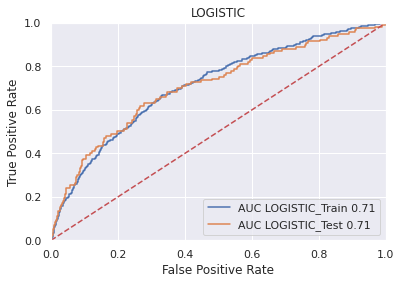

LOGISTIC CLASSIFICATION ACCURACY
------------------------------------------------
LOGISTIC_Train  =  0.6745247623811906
LOGISTIC_Test  =  0.6729182295573893


LOGISTIC AUC SCORE
------------------------------------------------
 Train:  0.7116914512520234 
 Test:  0.7084968097332858

CLASSIFICATION MODEL
------------------------------------------------
Total Variables:  11
INTERCEPT  =  -0.9666866902353912
AGE_BUILT  =  0.0035576303121643642
sale_price  =  1.3898673828520544e-06
AGE_SALE  =  -0.04184770828905203
DISTANCE  =  -0.03344053700850565
AV_BLDG_LOG  =  0.001773687703372232
LAND_SF_LOG  =  -0.005474740935100243
LIVING_AREA_LOG  =  -0.003585570800942307
AGE_REMODEL  =  0.006039873731751493
R_TOTAL_RMS  =  0.02119158534444504
edu_Pct_Age_25_plus_bachelors_plus  =  0.009228028395321108


In [33]:
WHO = "LOGISTIC"
 
CLM = LogisticRegression(solver='newton-cg', max_iter=1000, multi_class="auto", random_state=1,  class_weight = weights)
CLM = CLM.fit( U_train, Y_train['Target'])

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, U_train, Y_train['Target'])
TEST_CLM = getProbAccuracyScores( WHO + "_Test", CLM, U_test, Y_test['Target'])

print_ROC_Curve( WHO, [TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY\n------------------------------------------------", [TRAIN_CLM, TEST_CLM])
print("\n")    
print( WHO + " AUC SCORE\n------------------------------------------------\n", 'Train: ', TRAIN_CLM[-1], '\n Test: ', TEST_CLM[-1])

 
REG_STEP_CLM_COEF = getCoefLogit(CLM, U_train) 

REG_STEP_CLM = TEST_CLM.copy() 

Feature: 0, Score: -0.04185
Feature: 1, Score: -0.03344
Feature: 2, Score: -0.00547
Feature: 3, Score: -0.00359
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00177
Feature: 6, Score: 0.00356
Feature: 7, Score: 0.00604
Feature: 8, Score: 0.00923
Feature: 9, Score: 0.02119


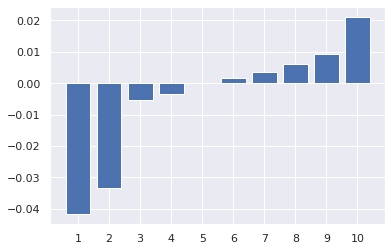

In [34]:
from matplotlib import pyplot

importance = CLM.coef_[0]
importance=np.sort(importance)
importance

xlabnum = [x+1 for x in range(len(importance))]
xlabnum

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance); 
plt.xticks([x for x in range(len(importance))],xlabnum)
pyplot.show();


### Get Performance Statistics from TRAIN

In [35]:
# Make predictions using the training set
# These are the binary (1,0) predictions
dftrain_y_log_pred = CLM.predict(U_train)

# These are the actual probabilities of 0 or 1
dftrain_y_log_prob = CLM.predict_proba(U_train)

# Calculate the F-1 Score
f1 = f1_score(Y_train, dftrain_y_log_pred)

# AUC Score
auc = TRAIN_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_train, dftrain_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_train, dftrain_y_log_pred)
recall = recall_score(Y_train, dftrain_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_train, dftrain_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftrain_y_log_pred))


===== CONFUSION MATRIX =====

[[10506  5054]
 [  151   281]]


ACCURACY: 0.6745247623811906
F1-SCORE: 0.09745101439223167
PRECISION: 0.05267104029990628
RECALL: 0.6504629629629629
AUC 0.7116914512520234
# PREDICTED TARGETS: 5335


### Get Performance Statistics from TEST

In [36]:
# Make predictions using the testing set
# These are the binary (1,0) predictions
dftest_y_log_pred = CLM.predict(U_test)

# These are the actual probabilities of 0 or 1
dftest_y_log_prob = CLM.predict_proba(U_test)

# Calculate the F-1 Score
f1 = f1_score(Y_test, dftest_y_log_pred)

# AUC Score
auc = TEST_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_test, dftest_y_log_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_test, dftest_y_log_pred)
recall = recall_score(Y_test, dftest_y_log_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_test, dftest_y_log_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftest_y_log_pred))


===== CONFUSION MATRIX =====

[[2614 1268]
 [  40   77]]


ACCURACY: 0.6729182295573893
F1-SCORE: 0.10533515731874145
PRECISION: 0.05724907063197026
RECALL: 0.6581196581196581
AUC 0.7084968097332858
# PREDICTED TARGETS: 1345


# SAVE THE MODEL

In [37]:
import pickle

# save the model to disk
filename = 'classification_model.obj'

pickle.dump(CLM, open(filename, 'wb')) 

# load the model from disk
class_model = pickle.load(open(filename, 'rb'))

# IMPORT THE 2022 FILE

In [38]:
# Import Modeling Set
pa2022df1 = pd.read_csv('Condensed2022.csv', low_memory=False)
pa2022df1.shape
pa2022df1.info(verbose=True, show_counts=True )
pa2022df1.head()

(20108, 157)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20108 entries, 0 to 20107
Data columns (total 157 columns):
 #    Column                                        Non-Null Count  Dtype  
---   ------                                        --------------  -----  
 0    Unnamed: 0                                    20108 non-null  int64  
 1    PID                                           20108 non-null  int64  
 2    GIS_ID                                        20108 non-null  int64  
 3    ST_NUM                                        20108 non-null  object 
 4    ST_NAME                                       20108 non-null  object 
 5    UNIT_NUM                                      1 non-null      object 
 6    CITY                                          20108 non-null  object 
 7    ZIPCODE                                       20108 non-null  int64  
 8    LU_DESC                                       20108 non-null  object 
 9    BLDG_TYPE                                     20

,Unnamed: 0,PID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIPCODE,LU_DESC,BLDG_TYPE,OWN_OCC,OWNER,MAIL_ADDRESSEE,MAIL_ADDRESS,MAIL_CITY,MAIL_STATE,MAIL_ZIPCODE,RES_FLOOR,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,YR_BUILT,YR_REMODEL,STRUCTURE_CLASS,ROOF_STRUCTURE,INT_WALL,EXT_FINISHED,INT_COND,EXT_COND,OVERALL_COND,BED_RMS,FULL_BTH,HLF_BTH,KITCHEN,TT_RMS,BTHRM_STYLE1,BTHRM_STYLE2,BTHRM_STYLE3,KITCHEN_STYLE1,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,AC_TYPE,FIRE_PLACE,bi_pid_long,bi_st_name,bi_num_bldgs,bi_flood,bi_stormwater,bi_census_tract_number,inc_Census Tract,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_lt_10000,inc_pct_fam_married_couple_inc_10000_14999,inc_pct_fam_married_couple_inc_15000_24999,inc_pct_fam_married_couple_inc_25000_34999,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,inc_pct_fam_married_couple_inc_100000_149999,inc_pct_fam_married_couple_inc_150000_199999,inc_pct_fam_married_couple_inc_gt_200000,inc_othr_fam_married_couple_inc_median,inc_cnt_hh_non_fam_total,inc_pct_hh_non_fam_inc_lt_10000,inc_pct_hh_non_fam_inc_10000_14999,inc_pct_hh_non_fam_inc_15000_24999,inc_pct_hh_non_fam_inc_25000_34999,inc_pct_hh_non_fam_inc_35000_49999,inc_pct_hh_non_fam_inc_50000_74999,inc_pct_hh_non_fam_inc_75000_99999,inc_pct_hh_non_fam_inc_100000_149999,inc_pct_hh_non_fam_inc_150000_199999,inc_pct_hh_non_fam_inc_gt_200000,inc_othr_hh_non_fam_inc_median,as_Census Tract,as_Cnt_Total_Population,as_Othr_Median_age_(years),as_Ratio_Sex_ratio_(males_per_100_females),as_Ratio_Age_dependency_ratio,as_Ratio_Old-age_dependency_ratio,as_Ratio_Child_dependency_ratio,as_Pct_Age_Under_5_years,as_Pct_Age_5_to_9_years,as_Pct_Age_10_to_14_years,as_Pct_Age_15_to_19_years,as_Pct_Age_20_to_24_years,as_Pct_Age_25_to_29_years,as_Pct_Age_30_to_34_years,as_Pct_Age_35_to_39_years,as_Pct_Age_40_to_44_years,as_Pct_Age_45_to_49_years,as_Pct_Age_50_to_54_years,as_Pct_Age_55_to_59_years,as_Pct_Age_60_to_64_years,as_Pct_Age_65_to_69_years,as_Pct_Age_70_to_74_years,as_Pct_Age_75_to_79_years,as_Pct_Age_80_to_84_years,as_Pct_Age_85_years_and_over,as_Pct_Age_5_to_14_years,as_Pct_Age_15_to_17_years,as_Pct_Age_Under_18_years,as_Pct_Age_18_to_24_years,as_Pct_Age_15_to_44_years,as_Pct_Age_16_years_and_over,as_Pct_Age_18_years_and_over,as_Pct_Age_21_years_and_over,as_Pct_Age_60_years_and_over,as_Pct_Age_62_years_and_over,as_Pct_Age_65_years_and_over,as_Pct_Age_75_years_and_over,as_Cnt_Male_Total_Population,as_Othr_Male_Age_Median_age_(years),as_Cnt_Female_Total_Population,as_Othr_Female_Age_Median_age_(years),as_Pct_Female_Age_21_years_and_over,edu_Census Tract,edu_Pct_Age_18to24_lt_high_school,edu_Pct_Age_18to24_high_school,edu_Pct_Age_18to24_some_college,edu_Pct_Age_18to24_bachelors,edu_Pct_Age_25_plus_lt_9th,edu_Pct_Age_25_plus_some_high_school,edu_Pct_Age_25_plus_high_school,edu_Pct_Age_25_plus_some_college,edu_Pct_Age_25_plus_associates,edu_Pct_Age_25_plus_bachelors,edu_Pct_Age_25_plus_grad_professional,edu_Pct_Age_25_plus_high_school_plus,edu_Pct_Age_25_plus_bachelors_plus,edu_Pct_Age_25to34_high_school_plus,edu_Pct_Age_25to34_bachelors_plus,edu_Pct_Age_35to44_high_school_plus,edu_Pct_Age_35to44_bachelors_plus,edu_Pct_Age_45to64_high_school_plus,edu_Pct_Age_45to64_bachelors_plus,edu_Pct_Age_65_plus_high_school_plus,edu_Pct_Age_65_plus_bachelors_plus,MAP_PAR_ID,LOC_ID,Shape_STAr,Shape_STLe,Shape_ST_1,Shape_ST_2,Shape__Area,Shape__Length,loc_id,owner1,own_addr,own_city,own_zip,sale_date,sale_price
0,0,1000019000,1000019000,3,WORTHINGTON ST,NaN,ROXBURY CROSSIN,2120,SINGLE FAM DWELLING,RM - Row Middle,Y,OBRIEN MARY V,NaN,3 WORTHINGTON ST,ROXBURY,MA,02120,3.00,1440.00,2688.00,2016.00,"380,500","533,700","914,200",1900.00,NaN,R -,M - Mansard,N - Normal,B - Brick/Stone,A - Average,A - Average,A - Average,5,1,0,1,8,M - Modern,NaN,NaN,S - Semi-Modern,NaN,NaN,W - Ht Water/Steam,N - None,0,1000019000,WORTHINGTON,1.00,f,f,25025080900,25025080900,91,0.00,0.00

In [39]:
# Keep Only Variables Required for Scoring Model
pa2022df2 = pa2022df1[[
  'PID'
, 'YR_BUILT'
, 'sale_date'
, 'sale_price'
, 'BLDG_VALUE'
, 'LAND_SF'
, 'LIVING_AREA'
, 'YR_REMODEL'
, 'TT_RMS' 
, 'edu_Pct_Age_25_plus_bachelors_plus'  
]]

pa2022df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20108 entries, 0 to 20107
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   PID                                 20108 non-null  int64  
 1   YR_BUILT                            20107 non-null  float64
 2   sale_date                           20108 non-null  float64
 3   sale_price                          20108 non-null  float64
 4   BLDG_VALUE                          20108 non-null  object 
 5   LAND_SF                             20105 non-null  float64
 6   LIVING_AREA                         20108 non-null  float64
 7   YR_REMODEL                          7606 non-null   float64
 8   TT_RMS                              20108 non-null  int64  
 9   edu_Pct_Age_25_plus_bachelors_plus  20108 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 1.5+ MB


# Calculate Distance to the Center of Boston

In [40]:
# Import Latitude and Longitude by Property 
coords_df = pd.read_csv('GeoCode/pa_2022_geocoded.csv')
coords_df = coords_df[["PID","LATITUDE","LONGITUDE"]]
coords_df.info()
coords_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25640 entries, 0 to 25639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PID        25640 non-null  int64  
 1   LATITUDE   25217 non-null  float64
 2   LONGITUDE  25217 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 601.1 KB


,PID,LATITUDE,LONGITUDE
0,802870050,42.32,-71.08
1,1101083000,NaN,NaN
2,1102053000,42.31,-71.10
3,1301250010,42.32,-71.07
4,700950000,42.34,-71.05


In [41]:
# Set a Tuple of Lat/Long for the center of Boston
boston = (42.361145, -71.057083)
 # Determine number of rows
nrecs = coords_df.shape[0]

# Initialize an empty list of distances
distances = []

for i in range(nrecs):
    cpid = coords_df.iloc[i,0]
    lat  = coords_df.iloc[i,1]
    long = coords_df.iloc[i,2]
    coords = (lat, long)
    if lat>0 :
      dist = geopy.distance.geodesic(coords, boston).miles
    else:
      dist = NaN
    
    distances.append(dist)
    #print( i, cpid, lat, long, coords, dist)

# Append Distances to DataFrame
coords_df["DISTANCE"] =  distances
coords_df.head()
coords_df.info()

,PID,LATITUDE,LONGITUDE,DISTANCE
0,802870050,42.32,-71.08,2.74
1,1101083000,NaN,NaN,NaN
2,1102053000,42.31,-71.10,4.03
3,1301250010,42.32,-71.07,3.15
4,700950000,42.34,-71.05,1.82


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25640 entries, 0 to 25639
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PID        25640 non-null  int64  
 1   LATITUDE   25217 non-null  float64
 2   LONGITUDE  25217 non-null  float64
 3   DISTANCE   25217 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 801.4 KB


In [42]:
# Add Distance to Primary Data

print('shape before adding distance:',pa2022df2.shape)
pa2022df2 = pd.merge(pa2022df2, coords_df, left_on='PID', right_on="PID", how='left') 
print('shape after adding distance:',pa2022df2.shape)
pa2022df2.head()

shape before adding distance: (20108, 10)
shape after adding distance: (20108, 13)


,PID,YR_BUILT,sale_date,sale_price,BLDG_VALUE,LAND_SF,LIVING_AREA,YR_REMODEL,TT_RMS,edu_Pct_Age_25_plus_bachelors_plus,LATITUDE,LONGITUDE,DISTANCE
0,1000019000,1900.00,19910724.00,9.00,"533,700",1440.00,2016.00,NaN,8,74.60,42.33,-71.10,2.99
1,1000024000,1900.00,20160701.00,817500.00,"656,500",1440.00,2026.00,2016.00,6,74.60,42.33,-71.10,2.98
2,1000027000,1875.00,20070615.00,815000.00,"859,900",1440.00,2581.60,2000.00,8,74.60,42.33,-71.10,2.97
3,1000029000,1900.00,19870101.00,0.00,"577,400",1440.00,2016.00,NaN,8,74.60,42.33,-71.10,2.96
4,1000093000,1900.00,19870101.00,0.00,"759,700",1600.00,2184.00,NaN,8,74.60,42.33,-71.10,3.00


# Convert Date Columns to Age Columns


### Convert YEAR BUILT to AGE BUILT

In [43]:
pa2022df2["YR_BUILT"].value_counts().sort_index()
print('\n\n') 

pa2022df3 = pa2022df2.copy()
 
# Convert YEAR BUILT to AGE BUILT
pa2022df3['AGE_BUILT'] = np.where(pa2022df3['YR_BUILT'] > 0, 2022-pa2022df3["YR_BUILT"] , NaN)
pa2022df3.shape
print('\n\n')
pa2022df3.groupby("YR_BUILT")["AGE_BUILT"].value_counts().sort_index()
print('\n\n')

# Confirm number of NULL values
zero  = pa2022df3[pa2022df3["YR_BUILT"]==0]["YR_BUILT"].value_counts().sort_index()
nulls = pa2022df3["YR_BUILT"].isna().sum() 
# print('YR_BUILT = 0 or NULL: ' + str(zero[0] + nulls)) 
print('YR_BUILT = 0: ' , zero ) 
print('YR_BUILT = NULL: ' + str(nulls)) 
res = pa2022df3["AGE_BUILT"].isna().value_counts().sort_index()
print('AGE_BUILT = NULL: ' + str(res[1])) 

1710.00       1
1725.00       1
1779.00       1
1790.00       1
1798.00       1
1800.00       9
1803.00       1
1804.00       1
1805.00       1
1810.00       3
1818.00       1
1820.00       2
1821.00       1
1825.00       2
1826.00       2
1830.00       2
1831.00       1
1832.00       1
1835.00       4
1840.00       8
1842.00       1
1844.00       1
1845.00       2
1848.00       2
1849.00       1
1850.00      29
1851.00       2
1855.00       7
1856.00       3
1857.00       1
1859.00       3
1860.00      40
1862.00       3
1863.00       4
1864.00       6
1865.00      25
1866.00       2
1867.00       2
1868.00       4
1869.00       5
1870.00      72
1871.00       7
1872.00      10
1873.00       4
1874.00       8
1875.00      66
1876.00      12
1877.00       5
1878.00       6
1879.00       8
1880.00     301
1881.00       5
1882.00       5
1883.00      10
1884.00      37
1885.00     180
1886.00      24
1887.00      23
1888.00      20
1889.00      28
1890.00     656
1891.00      13
1892.00 

(20108, 14)

YR_BUILT  AGE_BUILT
1710.00   312.00          1
1725.00   297.00          1
1779.00   243.00          1
1790.00   232.00          1
1798.00   224.00          1
1800.00   222.00          9
1803.00   219.00          1
1804.00   218.00          1
1805.00   217.00          1
1810.00   212.00          3
1818.00   204.00          1
1820.00   202.00          2
1821.00   201.00          1
1825.00   197.00          2
1826.00   196.00          2
1830.00   192.00          2
1831.00   191.00          1
1832.00   190.00          1
1835.00   187.00          4
1840.00   182.00          8
1842.00   180.00          1
1844.00   178.00          1
1845.00   177.00          2
1848.00   174.00          2
1849.00   173.00          1
1850.00   172.00         29
1851.00   171.00          2
1855.00   167.00          7
1856.00   166.00          3
1857.00   165.00          1
1859.00   163.00          3
1860.00   162.00         40
1862.00   160.00          3
1863.00   159.00          4
1864.00   158.00          6





YR_BUILT = 0:  Series([], Name: YR_BUILT, dtype: int64)
YR_BUILT = NULL: 1
AGE_BUILT = NULL: 1


### Convert YEAR REMODEL to AGE REMODEL

In [44]:
pa2022df3["YR_REMODEL"].value_counts().sort_index()
print('\n\n')

# Convert YEAR REMODEL to AGE REMODEL
pa2022df3['AGE_REMODEL'] = np.where(pa2022df3['YR_REMODEL'] > 0, 2022-pa2022df3["YR_REMODEL"] , NaN)
pa2022df3.shape
print('\n\n')
pa2022df3.groupby("YR_REMODEL")["AGE_REMODEL"].value_counts().sort_index()
print('\n\n')

# Confirm number of NULL values
zero  = pa2022df3[pa2022df3["YR_REMODEL"]==0]["YR_REMODEL"].value_counts().sort_index()
nulls = pa2022df3["YR_REMODEL"].isna().sum()
# print('YR_REMOD = 0 or NULL: ' + str(zero[0] + nulls)) 
print('YR_REMODEL = 0: ' , zero ) 
print('YR_REMODEL = NULL: ' + str(nulls)) 
res = pa2022df3["AGE_REMODEL"].isna().value_counts().sort_index()
print('AGE_REMODEL = NULL: ' + str(res[1])) 

1904.00      1
1919.00      1
1930.00      1
1935.00      4
1940.00      4
1945.00      6
1947.00      1
1948.00      1
1949.00      1
1950.00     54
1951.00      1
1952.00      3
1953.00      3
1955.00     10
1956.00      3
1957.00      3
1958.00      5
1959.00      4
1960.00     60
1961.00      2
1962.00      5
1963.00      3
1964.00      5
1965.00     23
1966.00      5
1967.00      6
1968.00      4
1969.00      9
1970.00     61
1971.00      9
1972.00      9
1973.00     12
1974.00     24
1975.00     62
1976.00     13
1977.00     21
1978.00     33
1979.00     31
1980.00     71
1981.00     20
1982.00     41
1983.00     44
1984.00    131
1985.00     54
1986.00     12
1987.00     22
1988.00     30
1989.00    191
1990.00    165
1991.00     31
1992.00     46
1993.00     39
1994.00     64
1995.00     62
1996.00     93
1997.00     84
1998.00    131
1999.00    142
2000.00    131
2001.00    206
2002.00    302
2003.00    326
2004.00    247
2005.00    218
2006.00    221
2007.00    173
2008.00   

(20108, 15)

YR_REMODEL  AGE_REMODEL
1904.00     118.00           1
1919.00     103.00           1
1930.00     92.00            1
1935.00     87.00            4
1940.00     82.00            4
1945.00     77.00            6
1947.00     75.00            1
1948.00     74.00            1
1949.00     73.00            1
1950.00     72.00           54
1951.00     71.00            1
1952.00     70.00            3
1953.00     69.00            3
1955.00     67.00           10
1956.00     66.00            3
1957.00     65.00            3
1958.00     64.00            5
1959.00     63.00            4
1960.00     62.00           60
1961.00     61.00            2
1962.00     60.00            5
1963.00     59.00            3
1964.00     58.00            5
1965.00     57.00           23
1966.00     56.00            5
1967.00     55.00            6
1968.00     54.00            4
1969.00     53.00            9
1970.00     52.00           61
1971.00     51.00            9
1972.00     50.00            9
1973.00     49.




YR_REMODEL = 0:  Series([], Name: YR_REMODEL, dtype: int64)
YR_REMODEL = NULL: 12502
AGE_REMODEL = NULL: 12502


In [45]:
# Plug NULL 'AGE_REMODEL' with 'AGE_BUILT'
 
pa2022df3["AGE_REMODEL"] = np.where(pa2022df3['AGE_REMODEL'].isna(), pa2022df3['AGE_BUILT'], pa2022df3['AGE_REMODEL'])



# Confirm number of NULL values
# pa2022df3[["AGE_REMODEL"]].info()
pa2022df3[["AGE_REMODEL"]].isna().sum().sort_values()

AGE_REMODEL    0
dtype: int64

### Convert SALE DATE to AGE SALE

In [46]:
pa2022df3["sale_date"].value_counts().sort_index()
print('\n\n')

# Output SALE_DATE to a Series
sale_dt = pa2022df3['sale_date']      

# Initialize an Empty List of SALE YEAR
sale_yr = []

# Extract the SALE YEAR and add it to the List
for i in range(len(sale_dt)):
  x = str(sale_dt[i]) 
  x = x[0:4]

  sale_yr.append(int(x))

# Check that SALE_YEAR matches YEAR(SALE_DATE)
sale_dt[:10]   
print('\n')
sale_yr[:10]
print('\n\n')

# Add SALE YEAR to DataFrame
pa2022df3['SALE_YEAR'] = sale_yr
pa2022df3.shape
print('\n\n')
pa2022df3.groupby("sale_date")["SALE_YEAR"].value_counts().sort_index()
print('\n\n')

# Confirm number of NULL values
res = pa2022df3["SALE_YEAR"].isna().sum()
print('SALE_YEAR = NULL: ' + str(res))
print('\n')
pa2022df3["SALE_YEAR"].value_counts().sort_index()

19870101.00    1998
19870102.00      15
19870105.00       1
19870106.00       1
19870107.00       1
               ... 
20200115.00       4
20200116.00       1
20200117.00       4
20200121.00       4
20200122.00       2
Name: sale_date, Length: 6447, dtype: int64

0   19910724.00
1   20160701.00
2   20070615.00
3   19870101.00
4   19870101.00
5   20050103.00
6   20171002.00
7   20040102.00
8   20140530.00
9   20130206.00
Name: sale_date, dtype: float64

[1991, 2016, 2007, 1987, 1987, 2005, 2017, 2004, 2014, 2013]

(20108, 16)

sale_date    SALE_YEAR
19870101.00  1987         1998
19870102.00  1987           15
19870105.00  1987            1
19870106.00  1987            1
19870107.00  1987            1
                          ... 
20200115.00  2020            4
20200116.00  2020            1
20200117.00  2020            4
20200121.00  2020            4
20200122.00  2020            2
Name: SALE_YEAR, Length: 6447, dtype: int64




SALE_YEAR = NULL: 0




1987    2173
1988     168
1989     196
1990     173
1991     213
1992     298
1993     294
1994     370
1995     383
1996     411
1997     419
1998     457
1999     461
2000     392
2001     440
2002     453
2003     558
2004     703
2005     702
2006     626
2007     610
2008     583
2009     585
2010     644
2011     549
2012     693
2013     814
2014     768
2015     909
2016     954
2017    1011
2018    1012
2019    1045
2020      41
Name: SALE_YEAR, dtype: int64

In [47]:
# Convert SALE YEAR to AGE SALE
pa2022df3['AGE_SALE'] = np.where(pa2022df3['SALE_YEAR'] > 0, 2022-pa2022df3["SALE_YEAR"] , NaN)
pa2022df3.shape
print('\n\n')
pa2022df3.groupby("SALE_YEAR")["AGE_SALE"].value_counts().sort_index()


(20108, 17)

SALE_YEAR  AGE_SALE
1987       35.00       2173
1988       34.00        168
1989       33.00        196
1990       32.00        173
1991       31.00        213
1992       30.00        298
1993       29.00        294
1994       28.00        370
1995       27.00        383
1996       26.00        411
1997       25.00        419
1998       24.00        457
1999       23.00        461
2000       22.00        392
2001       21.00        440
2002       20.00        453
2003       19.00        558
2004       18.00        703
2005       17.00        702
2006       16.00        626
2007       15.00        610
2008       14.00        583
2009       13.00        585
2010       12.00        644
2011       11.00        549
2012       10.00        693
2013       9.00         814
2014       8.00         768
2015       7.00         909
2016       6.00         954
2017       5.00        1011
2018       4.00        1012
2019       3.00        1045
2020       2.00          41
Name: AGE_SALE, dtype: int64

# Plug Missing Values

In [48]:
# Convert 'BLDG_VALUE' to Numeric
pa2022df4 = pa2022df3.copy()

pa2022df4['BLDG_VALUE2'] = pa2022df4['BLDG_VALUE'].str.replace(',', '').astype(float)  

# Rename 'R_TOTAL_RMS'
pa2022df4['R_TOTAL_RMS'] = pa2022df4['TT_RMS']

In [49]:
pa2022df4[[
  'AGE_BUILT'
, 'sale_price'
, 'AGE_SALE'
, 'DISTANCE'
, 'LAND_SF' 
, 'BLDG_VALUE'
, 'BLDG_VALUE2'
, 'LIVING_AREA'
, 'AGE_REMODEL'
, 'R_TOTAL_RMS'
, 'edu_Pct_Age_25_plus_bachelors_plus'
]].info()

pa2022df4[[
  'AGE_BUILT'
, 'sale_price'
, 'AGE_SALE'
, 'DISTANCE'
, 'LAND_SF' 
, 'BLDG_VALUE'
, 'BLDG_VALUE2'
, 'LIVING_AREA'
, 'AGE_REMODEL'
, 'R_TOTAL_RMS'
, 'edu_Pct_Age_25_plus_bachelors_plus'
]].describe()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 20108 entries, 0 to 20107
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   AGE_BUILT                           20107 non-null  float64
 1   sale_price                          20108 non-null  float64
 2   AGE_SALE                            20108 non-null  float64
 3   DISTANCE                            19822 non-null  float64
 4   LAND_SF                             20105 non-null  float64
 5   BLDG_VALUE                          20108 non-null  object 
 6   BLDG_VALUE2                         20108 non-null  float64
 7   LIVING_AREA                         20108 non-null  float64
 8   AGE_REMODEL                         20108 non-null  float64
 9   R_TOTAL_RMS                         20108 non-null  int64  
 10  edu_Pct_Age_25_plus_bachelors_plus  20108 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory

,AGE_BUILT,sale_price,AGE_SALE,DISTANCE,LAND_SF,BLDG_VALUE2,LIVING_AREA,AGE_REMODEL,R_TOTAL_RMS,edu_Pct_Age_25_plus_bachelors_plus
count,20107.00,20108.00,20108.00,19822.00,20105.00,20108.00,20108.00,20108.00,20108.00,20108.00
mean,88.83,214639.99,16.75,6.45,5796.87,398635.18,1726.51,58.89,7.26,45.45
std,31.83,251017.42,10.27,1.53,2874.91,175717.63,618.65,42.28,1.66,19.45
min,2.00,0.00,2.00,2.15,605.00,27153.00,372.00,1.00,3.00,3.80
25%,67.00,9.00,8.00,5.34,4111.00,279800.00,1316.80,18.00,6.00,31.20
50%,92.00,140000.00,15.00,6.61,5187.00,353900.00,1592.00,62.00,7.00,42.00
75%,112.00,366000.00,25.00,7.52,6629.00,465025.00,1989.40,96.00,8.00,63.90
max,312.00,2455000.00,35.00,9.75,72989.00,2152500.00,9160.60,312.00,18.00,87.40


In [50]:
means =[]

for element in [
                'AGE_BUILT'
              , 'sale_price'
              , 'AGE_SALE'
              , 'DISTANCE'
              , 'LAND_SF' 
              , 'BLDG_VALUE2'
              , 'LIVING_AREA'
              , 'AGE_REMODEL'
              , 'R_TOTAL_RMS'
              , 'edu_Pct_Age_25_plus_bachelors_plus']: 

    if element == 'DISTANCE':
      mean_plug = round(pa2022df4[element].mean(),2)
    elif element == 'edu_Pct_Age_25_plus_bachelors_plus':
      mean_plug = round(pa2022df4[element].mean(),2)
    else:
      mean_plug = round(pa2022df4[element].mean())

    means.append(mean_plug) 

    # Plug the Missing Values
    pa2022df4[element] = pa2022df4[element].replace(np.nan, mean_plug)

print('column means:', means,'\n\n') 

pa2022df4[[
  'AGE_BUILT'
, 'sale_price'
, 'AGE_SALE'
, 'DISTANCE'
, 'LAND_SF' 
, 'BLDG_VALUE'
, 'BLDG_VALUE2'
, 'LIVING_AREA'
, 'AGE_REMODEL'
, 'R_TOTAL_RMS'
, 'edu_Pct_Age_25_plus_bachelors_plus'
]].info()

print('\n\n') 

pa2022df4[[
  'AGE_BUILT'
, 'sale_price'
, 'AGE_SALE'
, 'DISTANCE'
, 'LAND_SF' 
, 'BLDG_VALUE'
, 'BLDG_VALUE2'
, 'LIVING_AREA'
, 'AGE_REMODEL'
, 'R_TOTAL_RMS'
, 'edu_Pct_Age_25_plus_bachelors_plus'
]].describe()


column means: [89, 214640, 17, 6.45, 5797, 398635, 1727, 59, 7, 45.45] 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20108 entries, 0 to 20107
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   AGE_BUILT                           20108 non-null  float64
 1   sale_price                          20108 non-null  float64
 2   AGE_SALE                            20108 non-null  float64
 3   DISTANCE                            20108 non-null  float64
 4   LAND_SF                             20108 non-null  float64
 5   BLDG_VALUE                          20108 non-null  object 
 6   BLDG_VALUE2                         20108 non-null  float64
 7   LIVING_AREA                         20108 non-null  float64
 8   AGE_REMODEL                         20108 non-null  float64
 9   R_TOTAL_RMS                         20108 non-null  int64  
 10  edu_Pct_Age_25_plus_bachelors_pl

,AGE_BUILT,sale_price,AGE_SALE,DISTANCE,LAND_SF,BLDG_VALUE2,LIVING_AREA,AGE_REMODEL,R_TOTAL_RMS,edu_Pct_Age_25_plus_bachelors_plus
count,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00
mean,88.83,214639.99,16.75,6.45,5796.87,398635.18,1726.51,58.89,7.26,45.45
std,31.83,251017.42,10.27,1.52,2874.70,175717.63,618.65,42.28,1.66,19.45
min,2.00,0.00,2.00,2.15,605.00,27153.00,372.00,1.00,3.00,3.80
25%,67.00,9.00,8.00,5.36,4111.75,279800.00,1316.80,18.00,6.00,31.20
50%,92.00,140000.00,15.00,6.58,5187.00,353900.00,1592.00,62.00,7.00,42.00
75%,112.00,366000.00,25.00,7.50,6628.25,465025.00,1989.40,96.00,8.00,63.90
max,312.00,2455000.00,35.00,9.75,72989.00,2152500.00,9160.60,312.00,18.00,87.40


# Convert Numeric to Log

In [51]:
pa2022df4['LAND_SF_LOG'] = np.log(pa2022df4['LAND_SF']) 
pa2022df4['AV_BLDG_LOG'] = np.log(pa2022df4['BLDG_VALUE2'] )
pa2022df4['LIVING_AREA_LOG'] = np.log(pa2022df4['LIVING_AREA'])

# Create the Final Model Set and Check for NULL Values

In [52]:
modelset = pa2022df4[[
  'PID'
, 'AGE_BUILT'
, 'sale_price'
, 'AGE_SALE'
, 'DISTANCE'
, 'AV_BLDG_LOG'
, 'LAND_SF_LOG'
, 'LIVING_AREA_LOG'
, 'AGE_REMODEL'
, 'R_TOTAL_RMS'
, 'edu_Pct_Age_25_plus_bachelors_plus'
]]

modelset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20108 entries, 0 to 20107
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   PID                                 20108 non-null  int64  
 1   AGE_BUILT                           20108 non-null  float64
 2   sale_price                          20108 non-null  float64
 3   AGE_SALE                            20108 non-null  float64
 4   DISTANCE                            20108 non-null  float64
 5   AV_BLDG_LOG                         20108 non-null  float64
 6   LAND_SF_LOG                         20108 non-null  float64
 7   LIVING_AREA_LOG                     20108 non-null  float64
 8   AGE_REMODEL                         20108 non-null  float64
 9   R_TOTAL_RMS                         20108 non-null  int64  
 10  edu_Pct_Age_25_plus_bachelors_plus  20108 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 2.3

# SCORE THE 2022 FILE

In [53]:
# Load the Model

class_model = pickle.load(open(filename, 'rb'))

In [54]:
pids = modelset['PID']
modeldata = modelset.drop('PID', axis=1)

print('Modelset:', modelset.shape )
print('PIDs:', pids.shape)
print('Modeldata:', modeldata.shape )

Modelset: (20108, 11)
PIDs: (20108,)
Modeldata: (20108, 10)


In [55]:
outcomes = class_model.predict(modeldata)

print('first 20 outcomes:', outcomes[:20])
print('number positive outcomes:', sum(outcomes))

# Append PID, Data, and Outcomes
# pa2022_class_df = pd.concat([modelset, outcomes], axis=1)
pa2022_class_df = modelset.copy()
pa2022_class_df['target'] = outcomes 

print('shape:', pa2022_class_df.shape, '\n\n')
print(pa2022_class_df.info(), '\n\n')
pa2022_class_df.head()

first 20 outcomes: [0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1]
number positive outcomes: 5747
shape: (20108, 12) 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20108 entries, 0 to 20107
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   PID                                 20108 non-null  int64  
 1   AGE_BUILT                           20108 non-null  float64
 2   sale_price                          20108 non-null  float64
 3   AGE_SALE                            20108 non-null  float64
 4   DISTANCE                            20108 non-null  float64
 5   AV_BLDG_LOG                         20108 non-null  float64
 6   LAND_SF_LOG                         20108 non-null  float64
 7   LIVING_AREA_LOG                     20108 non-null  float64
 8   AGE_REMODEL                         20108 non-null  float64
 9   R_TOTAL_RMS                         20108 non-null  int64

,PID,AGE_BUILT,sale_price,AGE_SALE,DISTANCE,AV_BLDG_LOG,LAND_SF_LOG,LIVING_AREA_LOG,AGE_REMODEL,R_TOTAL_RMS,edu_Pct_Age_25_plus_bachelors_plus,target
0,1000019000,122.00,9.00,31.00,2.99,13.19,7.27,7.61,122.00,8,74.60,0
1,1000024000,122.00,817500.00,6.00,2.98,13.39,7.27,7.61,6.00,6,74.60,1
2,1000027000,147.00,815000.00,15.00,2.97,13.66,7.27,7.86,22.00,8,74.60,1
3,1000029000,122.00,0.00,35.00,2.96,13.27,7.27,7.61,122.00,8,74.60,0
4,1000093000,122.00,0.00,35.00,3.00,13.54,7.38,7.69,122.00,8,74.60,0


# Output the Scored 2022 File

In [56]:
pa2022_class_df.to_csv('pa_2022_classification_model_scores.csv', header=True, index=False)